# Data Visualization with Seaborn

## Nathan Karst

# Seaborn

* Seaborn allows you to make great looking data visualizations in Python. 


* It also plays well with Pandas, which is even better.


* We'll just scratch the surface of what Seaborn can do here; if you want to learn more, check out Seaborn's [gallery](http://seaborn.pydata.org/examples/) and [API](http://seaborn.pydata.org/api.html). 

In [48]:
import pandas as pd # we'll still use Pandas for data management
import seaborn as sns 

# this command makes Jupyter plot the images right in the notebook.
%matplotlib inline 

# Loading the data

* Let's use the ToyotaCorolla data set that we were working on at the end of the previous notebook. 


* We'll see that the type of each column (e.g., numerical or categorical) is really important for how we think about visualization. 


* To make sure we're keeping everything straight in our heads, let's go ahead and manually convert the 0/1 in both Met_Color and Automatric to False/True.

In [71]:
df = pd.read_csv('../data/ToyotaCorolla.csv')
df.Automatic.replace([0,1],['False','True'], inplace=True)
df.Met_Color.replace([0,1],['False','True'], inplace=True)
df.head()

,Price,Age,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Weight
0,13500,23,46986,Diesel,90,True,False,2000,3,1165
1,13750,23,72937,Diesel,90,True,False,2000,3,1165
2,13950,24,41711,Diesel,90,True,False,2000,3,1165
3,14950,26,48000,Diesel,90,False,False,2000,3,1165
4,13750,30,38500,Diesel,90,False,False,2000,3,1170


# Numerical variables

* Before doing any kind of analytics, we often want to get an intuitive understanding of how our variables are distributed.


* For individual numerical variables, this often means looking at things like a histogram, box plot, or violin plots.


* Seaborn provides easy access to all of these. 

## One numerical variable

* The most basic visualization of a single numerical variable is a simple histogram. 


* In Seaborn, we use the `distplot` function.

/Users/nathankarst/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


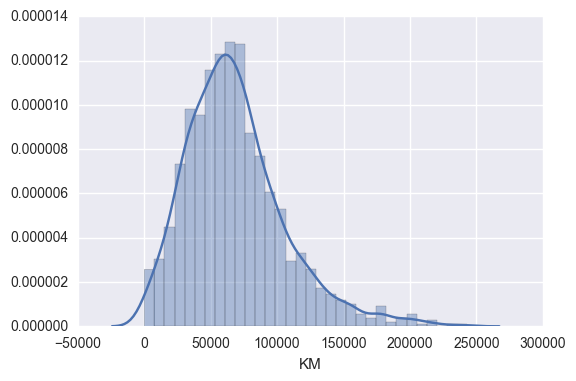

In [83]:
sns.distplot(df.KM)

* The vertical axies is scaled so that the total area of all the rectangles sums to 1. To turn this off, just add `norm_hist = False` to the `distplot` command. 


* The blue trace is called a kernel density estimate (KDE) and is trying to give us an idea of how the distribution would look if we collected an enormous amount of data. To turn this off, just add `kde = False` to the `distplot` command. 


* KDEs can be very handy at smoothing out rough distributions, but they can also produce weird results -- here it predicts that there would be cars that have driven a negative number of miles!

## Two numerical variables

* To visualize the joint distribution of two numerical variables, we can use the Seaborn function `jointplot`.


* Notice that the syntax is a little different here. We tell Seaborn which variables we want on the $x$ and $y$ axes, and then specify the parent data frame.

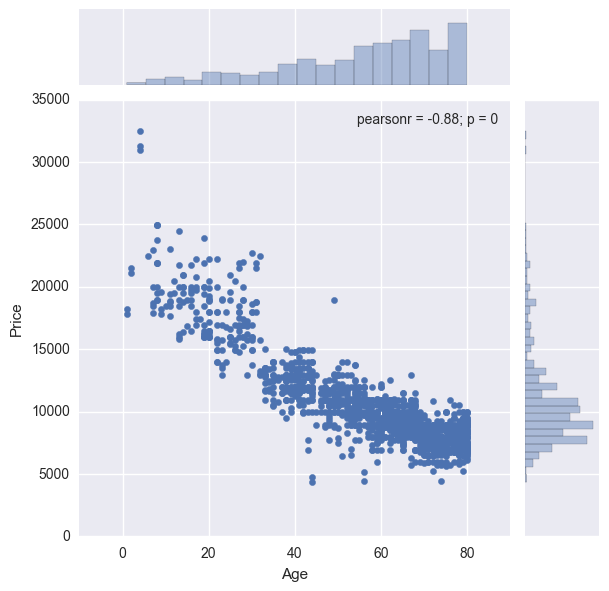

In [89]:
sns.jointplot(x='Age',y='Price',data=df)

* Joint plots are pretty flexible. Click down to see some other neat examples.

/Users/nathankarst/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


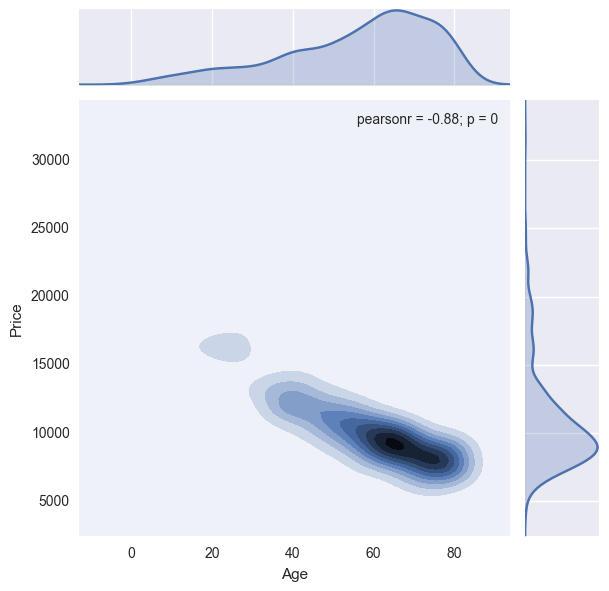

In [92]:
sns.jointplot(x='Age',y='Price',data=df,kind='kde')

/Users/nathankarst/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


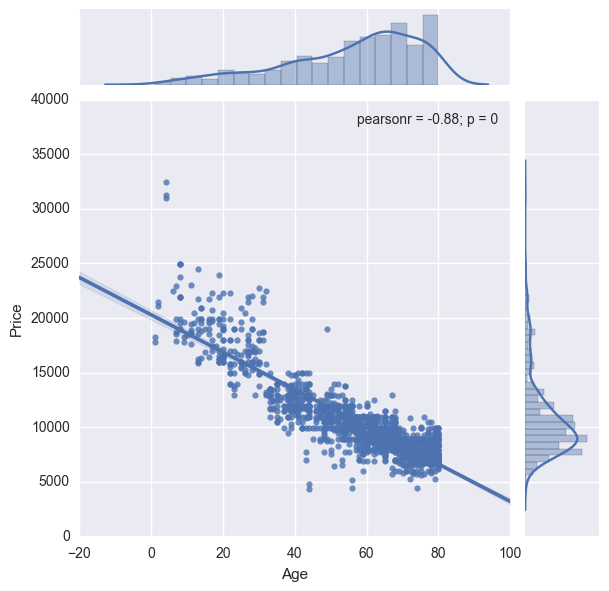

In [112]:
sns.jointplot(x='Age',y='Price',data=df,kind='reg')

# Boxplots

* Box plots are also easy to make in Seaborn.

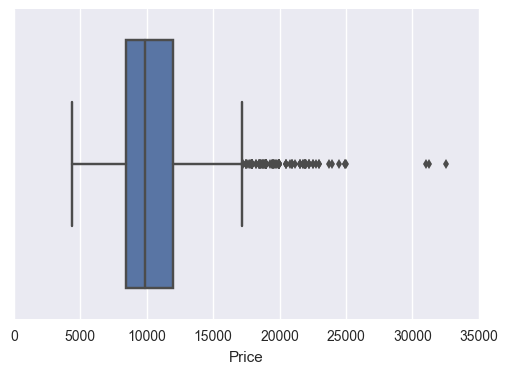

In [73]:
sns.boxplot(df.Price)

# Categorical variables 

* The easiest way to visualize a single categorical variable is a simple bar chart. 


* In Seaborn, we use the funciton `countplot`.

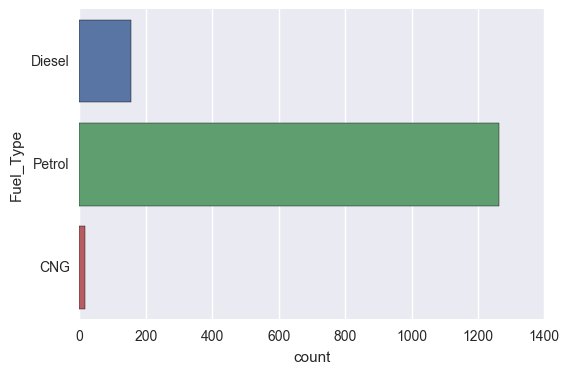

In [114]:
sns.countplot(y='Fuel_Type',data=df)

# Combining numerical and categorical variables

* But there's a whole new level of richness here, too. 


* This is where Seaborn gets really powerful.

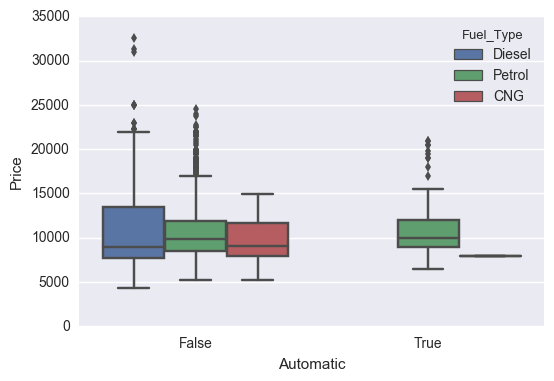

In [74]:
sns.boxplot(x='Automatic', y='Price', hue='Fuel_Type', data=df)

* With a simple box plot, we can have up to two independent variables -- one represented on an axis (here, the horizontal axis), and one represented as color. 

# Factor plots

* Factor plots allow us even more flexibility in examining relationships between a numerical variable like `Price` and categorical variables that might influence it. 

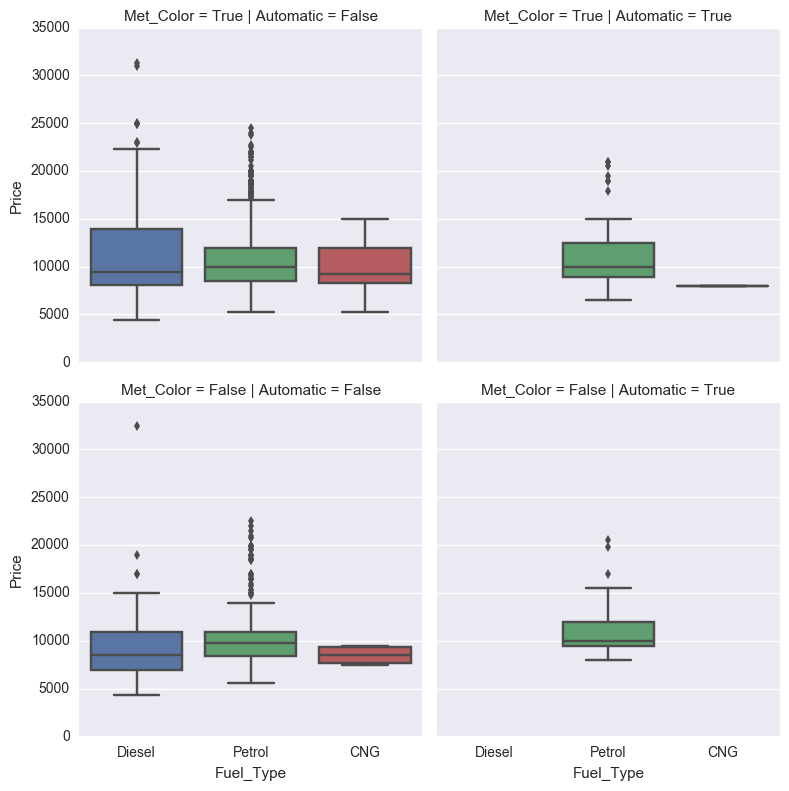

In [78]:
sns.factorplot(x='Fuel_Type', y='Price', col='Automatic', row='Met_Color', data=df, kind='box')

# Heat maps and cluster maps

* Heat maps are a useful way of visualizing a data frame full of numeric values. 


* In data exploration, we often want to know whether two numeric variables are highly correlated. 

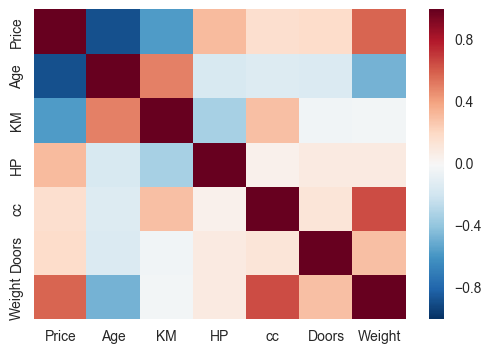

In [113]:
correlation = df.corr()
sns.heatmap(correlation)

* We can see that `Age` and `Price` are strongly negatively correlated -- the older the car, the lower the price -- while `cc` and `Weight` are strongly positively correlated -- the bigger the engine, the heavier the car. 


* Notice that Seaborn automatically used a diverging color scheme here. Warm colors represent positive correlation, and cool colors represent negative correlation. 

# Heatmaps and cluster maps

* Cluster maps are heat maps whose rows and columns have been rearranged to place similar vales near each other.


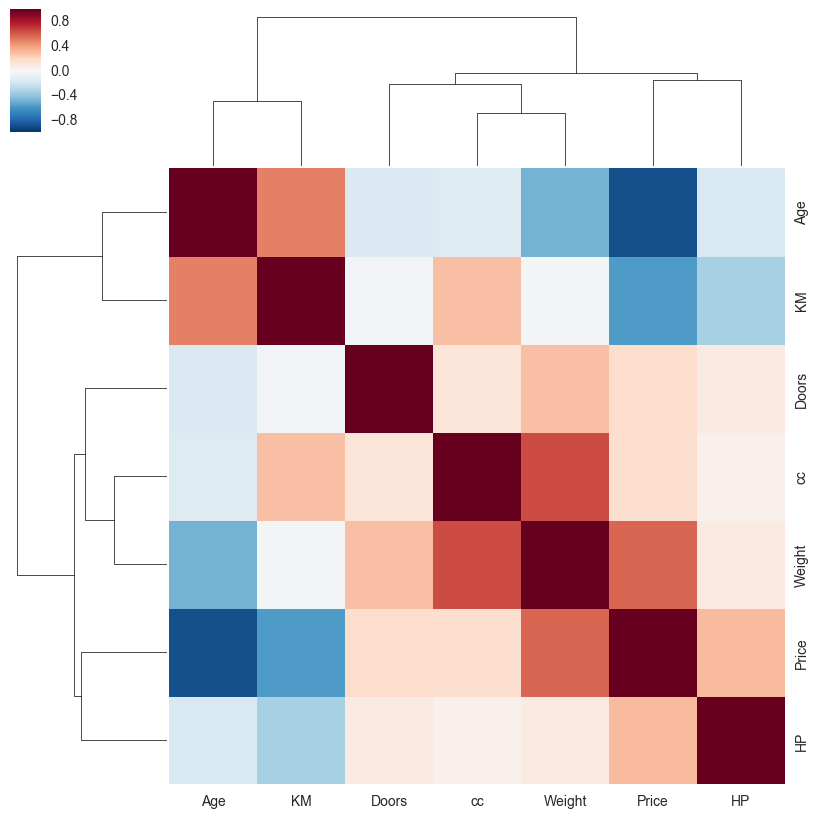

In [130]:
sns.clustermap(correlation)

* Here we can now easily see that the `Age` and `KM` are highly positively correlated with each other and weakly or negatively correlated with all other variables. 

# Your turn

* Create a new notebook.


* Load the data located in `forest_cover_type.csv`. The data dictionary can be found [here](https://www.kaggle.com/c/forest-cover-type-prediction/data). 


* Create a bar chart showing the distribution of the variable `Cover_Type`.


* Create a violin plot with `Cover_Type` as your `x` variable and `Elevation` as your `y` variable.


* Make a cluster map of the correlation matrix of the data frame. What groupings of variables do you see?


* Explore other relationships in the data set, paying particular attention to how various columns might help you predict `Cover_Type`.